### Initalizing spark

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Georgia_rentalPrice-Copy1") \
    .config("spark.executor.memory", '8g') \
    .config('spark.executor.cores', '4') \
    .config('spark.cores.max', '4') \
    .config("spark.driver.memory",'4g') \
    .getOrCreate()

sc = spark.sparkContext
sqlCtx = SQLContext(sc)

Downloading the data as a pandas data frame.

In [2]:
train_data_pd = pd.read_json("data/train.json")

Taking a look at the data.

In [4]:
train_data_pd

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street,medium
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street,low
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street,low
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace,medium
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th,low


In [92]:
set([t in ["low","medium","high"] for t in train_data_pd["interest_level"].tolist()])

{True}

Create a pySpark DataFrame of the pandas Data Frame.

In [3]:
train_data_df = sqlCtx.createDataFrame(train_data_pd)

Printing the schema. Seems to be ok for most part. The `created` should be changed from string to time object.

In [5]:
train_data_df.printSchema()

root
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- building_id: string (nullable = true)
 |-- created: string (nullable = true)
 |-- description: string (nullable = true)
 |-- display_address: string (nullable = true)
 |-- features: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- latitude: double (nullable = true)
 |-- listing_id: long (nullable = true)
 |-- longitude: double (nullable = true)
 |-- manager_id: string (nullable = true)
 |-- photos: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- price: long (nullable = true)
 |-- street_address: string (nullable = true)
 |-- interest_level: string (nullable = true)



Show the first row in the pySpark Data Frame.

In [6]:
train_data_df.show(1)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|      []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|        medium|
+---------+--------+--------------------+-------------------+--------------------+--------------

Printing the `bathrooms` column and sorting on the most frequent number of bathrooms.

In [7]:
train_data_df.groupBy('bathrooms').count().sort('count', ascending=False).show()

+---------+-----+
|bathrooms|count|
+---------+-----+
|      1.0|39422|
|      2.0| 7660|
|      3.0|  745|
|      1.5|  645|
|      0.0|  313|
|      2.5|  277|
|      4.0|  159|
|      3.5|   70|
|      4.5|   29|
|      5.0|   20|
|      5.5|    5|
|      6.0|    4|
|      7.0|    1|
|      6.5|    1|
|     10.0|    1|
+---------+-----+



Checking out the apartment with 10 bathrooms.

In [8]:
train_data_df.filter(train_data_df["bathrooms"] == 10.0).show()

+---------+--------+--------------------+-------------------+--------------------+---------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+---------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------+--------------+
|     10.0|       2|424f8014bddc288d2...|2016-04-09 04:34:31|***The building?s...|       W 52 St.|[Doorman, Elevato...| 40.7633|   6849204| -73.9849|0c71a59cb70215fbf...|[https://photos.r...| 3600|  260 W 52 St.|           low|
+---------+--------+--------------------+-------------------+--------------------+------

We we that it is a room with 2 bedrooms. Highly likely that it is a typo. We continue to check out the rental with 7 and 6.5 bathrooms.

In [9]:
train_data_df.filter((train_data_df["bathrooms"] == 7.0) | (train_data_df["bathrooms"] == 6.5) ).show()

+---------+--------+--------------------+-------------------+--------------------+--------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|     display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+--------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      6.5|       7|3be1175591e290053...|2016-06-22 03:15:54|This landmark Eng...|206 Upper Mountai...|[Garage, Garden, ...| 40.8336|   7198431|  -74.216|1d019cccf631394cd...|[https://photos.r...|14500|206 Upper Mountai...|           low|
|      7.0|       5|                   0|201

We see that these are way more expensive than the rental with 10 bathrooms which further the suspision that it is a typo. 

Printing the `bedrooms` column and sorting on the most frequent number of bedrooms.

In [10]:
train_data_df.groupBy('bedrooms').count().sort('count', ascending=False).show()

+--------+-----+
|bedrooms|count|
+--------+-----+
|       1|15752|
|       2|14623|
|       0| 9475|
|       3| 7276|
|       4| 1929|
|       5|  247|
|       6|   46|
|       7|    2|
|       8|    2|
+--------+-----+



Check out the 8 room apartments.

In [11]:
train_data_df.filter((train_data_df["bedrooms"] == 8)).show()

+---------+--------+--------------------+-------------------+--------------------+----------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+----------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description| display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|  street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+----------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+----------------+--------------+
|      4.0|       8|2d51ec2a54cf05468...|2016-06-25 06:09:20|Gorgeous 8 bedroo...|      Greene Ave|[Hardwood Floors,...| 40.6881|   7217045| -73.9553|9ba3641676cc717a8...|                  []| 6500|  393 Greene Ave|           low|
|      3.0|       8|f8bff653aae7c7555...|2016-06-13 02:47:37|Please note tha

We check for the `building_id` and conclude that we have 8286 missing values here.

In [12]:
train_data_df.groupBy('building_id').count().sort('count', ascending=False).show(5)

+--------------------+-----+
|         building_id|count|
+--------------------+-----+
|                   0| 8286|
|96274288c84ddd7d5...|  275|
|11e1dec9d14b1a9e5...|  215|
|80a120d6bc3aba97f...|  213|
|bb8658a3e432fb62a...|  212|
+--------------------+-----+
only showing top 5 rows



Displaying the `created` column.

In [13]:
train_data_df[["created"]].show(5)

+-------------------+
|            created|
+-------------------+
|2016-06-24 07:54:24|
|2016-06-12 12:19:27|
|2016-04-17 03:26:41|
|2016-04-18 02:22:02|
|2016-04-28 01:32:41|
+-------------------+
only showing top 5 rows



Changing the `created` column to timestamp objects instead of strings.

In [14]:
train_data_df = train_data_df.withColumn("created", F.to_timestamp("created"))

We create a coulm called `Day_of_week` which contains the day of the week the rental was created.

In [15]:
day_of_week = train_data_df.withColumn("Day_of_week", F.dayofweek(train_data_df["created"]))
day_of_week = day_of_week[["Day_of_week"]]
day_of_week.show(5)

+-----------+
|Day_of_week|
+-----------+
|          6|
|          1|
|          1|
|          2|
|          5|
+-----------+
only showing top 5 rows



We want to plot the count of the different days that the rental was created.

In [16]:
day_of_week_pd = day_of_week.toPandas()

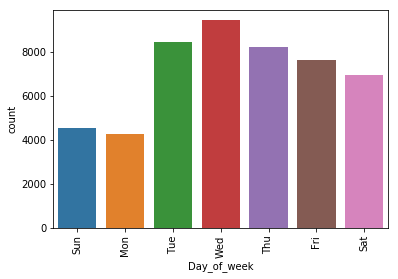

In [17]:
ax = sns.countplot(x="Day_of_week", data = day_of_week_pd)
ax.set_xticklabels(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"], rotation='vertical', fontsize=10)
plt.show()

We create a data frame with `longitude` and `latitude` in order to plot the positioning of the rental unit on a map.

In [21]:
long_lat_df = train_data_df[["longitude", "latitude"]]

In [19]:
long_lat_df.show(5)

+---------+--------+
|longitude|latitude|
+---------+--------+
| -73.9425| 40.7145|
| -73.9667| 40.7947|
| -74.0018| 40.7388|
| -73.9677| 40.7539|
| -73.9493| 40.8241|
+---------+--------+
only showing top 5 rows



Printing a statistic summary, mostly to see if there were any strange values. Which there were since we dont think that there are any rental units with longitude and latitude = 0.0

In [20]:
long_lat_df.describe().show()

+-------+------------------+------------------+
|summary|         longitude|          latitude|
+-------+------------------+------------------+
|  count|             49352|             49352|
|   mean|-73.95571552115474| 40.74154482290508|
| stddev|1.1779119215716662|0.6385353439544775|
|    min|          -118.271|               0.0|
|    max|               0.0|           44.8835|
+-------+------------------+------------------+



We see how many rental units that have longitude and latitude = 0.0

In [21]:
print("Number of observations with missing longitude: {}" .format(long_lat_df.filter(long_lat_df["longitude"] == 0.0).count()))
print("Number of observations with missing latitude: {}" .format(long_lat_df.filter(long_lat_df["latitude"] == 0.0).count()))

Number of observations with missing longitude: 12
Number of observations with missing latitude: 12


Could these be the same observations?

In [22]:
print("Number of observations with missing longitude and latitude: {}".format(long_lat_df.filter((long_lat_df["latitude"] == 0.0) & (long_lat_df["longitude"] == 0.0)).count()))

Number of observations with missing longitude and latitude: 12


Yes they are... So how many are remaining?

In [23]:
long_lat_df.filter(long_lat_df["latitude"] != 0.0).count()

49340

To plot the apartments we use the package `folium` which can make interactive plots and we can get more information of the rental units in the plot.

Inspiration from blogpost: https://nbviewer.jupyter.org/github/vincentropy/python_cartography_tutorial/blob/master/part1_basic_folium_maps.ipynb

In [38]:
!pip install --upgrade folium
import folium

  Using cached https://files.pythonhosted.org/packages/47/28/b3199bf87100e389c1dff88a44a38936d27e5e99eece870b5308186217c8/folium-0.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/63/36/1c93318e9653f4e414a2e0c3b98fc898b4970e939afeedeee6075dd3b703/branca-0.3.1-py3-none-any.whl
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


We create a function that places each of the units on the map. The color of the apartment corresponds to the factor `interest_level` which has not been investigated thoroughly yet. The size of the circle is based on the price which can be displayed by *klicking* the circle, along with the `street_address`.

In [52]:
def plot_rental_locatinos(rental_locatinos):
        # generate a new map
    folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=13,
                            tiles="CartoDB dark_matter",
                            width='50%')

            
    for index, row in rental_locatinos.iterrows():
        
            popup_text = "{}<br> Price: {}<br>"
            popup_text = popup_text.format(row["street_address"], row["price"])
            
            if row["interest_level"] == 'high':
                color="#77043e" # magenta
            if row["interest_level"] == 'medium':
                color="#ff9a16" # yellow 
            if row["interest_level"] == 'low':
                color="#6da39c" # teal
                
            radius = row["price"]/1000
        
            folium.CircleMarker(location=(row["latitude"],
                                      row["longitude"]),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

Since our data set is too big for all rental units to be displayed a subsample of 1000 units are changed into a pandas data frame which is then plotted using the above constructed function `plot_rental_locatinos`.

In [40]:
sample_pd = train_data_pd.sample(n = 1000)

The user constructed function `plot_rental_locatinos`

In [54]:
plot_rental_locatinos(sample_pd)

We want to explode and split on the column `features`. So that each feature gets it's own column with binary values.

In [29]:
list = train_data_df[["features"]].collect()[1][0]
list

['Doorman', 'Elevator', 'Fitness Center', 'Cats Allowed', 'Dogs Allowed']

We first have to handele the rentals with missing featurses by adding `missing` as a feature. Here are the 2 first listings with missing features.

In [30]:
train_data_df.filter(F.size("features")==0).show(2)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|      []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|        medium|
|      2.0|       4|38a913e46c94a7f46...|2016-04-19 04:24:47|                    |   West 18th S

In [ ]:
def fillMissing(features):
    if(len(features) == 0): return ['Missing Feature']
    else : return features

fill_missing_udf = F.udf(fillMissing)

#train_data_df2 = train_data_df.withColumn("features" , fill_missing_udf(F.col("features")))

In [ ]:
train_data_df2[["features"]].show(10)

In [ ]:
train_data_df2[["features"]].collect()[1][0]

In [ ]:
train_data_df2.withColumn("ex_features", F.explode(train_data_df2.features)).show(5)

In [ ]:
train_data_df.withColumn("ex_features", F.explode(train_data_df.features)).show(5)

# Georgia's work

I will explore the descriptions

In [5]:
train_data_df.show(3)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|                  []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|        medium|
|      1.0|       2|c5c8a357cba207596...|2016-06

In [6]:
# Check out this column
train_data_df.select(["description"]).show(20)

+--------------------+
|         description|
+--------------------+
|A Brand New 3 Bed...|
|                    |
|Top Top West Vill...|
|Building Amenitie...|
|Beautifully renov...|
|                    |
|Stunning unit wit...|
|This huge sunny ,...|
|<p><a  website_re...|
|This is a spaciou...|
|New to the market...|
|Check out this on...|
|***LOW FEE. Beaut...|
|Lincoln Square's ...|
|Spacious 1-Bedroo...|
|Stunning  full re...|
|East Village is a...|
|*Location: Thayer...|
|                    |
|                    |
+--------------------+
only showing top 20 rows



At first glance, it looks like we've got some missing values, use of special characters (** for instance), and capital letters might be important.

In [6]:
train_data_df.select(["description"]).count()

49352

## Formatting the data
adding columns, removing words etc.

In [4]:
# need to code numbers for the interest level
#train_data_df2 = train_data_df.withColumn("interest_level", if("interest_level"==0, "low"))


from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

def modify_values(r):
    if r == "high":
        return 2
    else:
        if r == "medium":
            return 1
        else:
            return 0
    
ol_val = udf(modify_values, StringType())
new_df = train_data_df.withColumn("interest_level",ol_val(train_data_df.interest_level))
new_df.show(2)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|                  []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|             1|
|      1.0|       2|c5c8a357cba207596...|2016-06

In [5]:
train_data_df2 = new_df.select("interest_level","description")
train_data_df2.groupBy("interest_level").count().show()

+--------------+-----+
|interest_level|count|
+--------------+-----+
|             0|34284|
|             1|11229|
|             2| 3839|
+--------------+-----+



In [6]:
# Add columns for some potentially interesting aspects

train3 = train_data_df2.withColumn('exclamation', F.expr("IF(INSTR(description, '!') > 0, 1, 0)"))\
.withColumn('star', F.expr("IF(INSTR(description, '*') > 0, 1, 0)"))\
.withColumn('missing', F.expr("IF(INSTR(description, '        ') > 0, 1, 0)"))\
.withColumn('no fee', F.expr("IF(INSTR(description, 'no fee')|INSTR(description, 'NO FEE') >0,1,0)"))\
.withColumn('eq opp', F.expr("IF(INSTR(description, 'equal opportunity')|INSTR(description, 'EQUAL OPPORTUNITY')|INSTR(description, 'Equal opportunity') >0,1,0)"))
train3.show(2)

+--------------+--------------------+-----------+----+-------+------+------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|
+--------------+--------------------+-----------+----+-------+------+------+
|             1|A Brand New 3 Bed...|          1|   0|      0|     0|     0|
|             0|                    |          0|   0|      1|     0|     0|
+--------------+--------------------+-----------+----+-------+------+------+
only showing top 2 rows



In [7]:
# deal with missing values
from pyspark.sql.functions import isnan

train3.filter((train3["description"] == "") | train3["description"].isNull() | isnan(train3["description"])).count()

from pyspark.sql.functions import when, lit, col

def replace(column, value):
    return when(column != value, column).otherwise(lit("none"))

train4 = train3.withColumn("description", replace(col("description"), '        '))
train4 = train4.withColumn("description", replace(col("description"), ""))
train4 = train4.withColumn("description", replace(col("description"), " "))
train4 = train4.withColumn("description", replace(col("description"), "           "))


train4.show(2)

+--------------+--------------------+-----------+----+-------+------+------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|
+--------------+--------------------+-----------+----+-------+------+------+
|             1|A Brand New 3 Bed...|          1|   0|      0|     0|     0|
|             0|                none|          0|   0|      1|     0|     0|
+--------------+--------------------+-----------+----+-------+------+------+
only showing top 2 rows



In [8]:
train4.filter((train4["description"] == "")).count()
#| train4["description"].isNull() | isnan(train4["description"])).count()


0

Using a handy-dandy tutorial from https://wesslen.github.io/twitter/predicting_twitter_profile_location_with_pyspark/

In [8]:
# split first
(train_trial, test_trial)= train4.randomSplit([0.8, 0.2], seed = 1337)

In [101]:
train_trialpd = train_trial.toPandas()

In [ ]:
seaborn.catplot(x="interest_level",data = train_trialpd,order=["low","medium","high"])

In [9]:
# split again
(train_B, test_B) = train_trial.randomSplit([0.8,0.2], seed=1000)

In [10]:
train_B.show(2)

+--------------+--------------------+-----------+----+-------+------+------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|
+--------------+--------------------+-----------+----+-------+------+------+
**NO FEE**IMMEDI...|          1|   1|      0|     1|     0|
Beautiful Luxury...|          1|   0|      0|     1|     0|
+--------------+--------------------+-----------+----+-------+------+------+
only showing top 2 rows



In [99]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import LogisticRegression

# regular expression tokenizer
regexTokenizer = RegexTokenizer(inputCol="description", outputCol="words", pattern="\\W") # I don't know what W is...

# stop words
add_stopwords = ["a","the","it","of","the","is","and", # standard stop words
     "A","this","in","for", "with"]
stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered").setStopWords(add_stopwords)

# bag of words count
countVectors = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=10000, minDF=5)



In [101]:
from pyspark.ml import Pipeline
from pyspark.ml.linalg import DenseVector
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType


pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(train4)
dataset = pipelineFit.transform(train4)
dataset = dataset.withColumn("label", dataset["interest_level"].cast(IntegerType()))
dataset.show(4)

+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|               words|            filtered|            features|label|
+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+
|             1|A Brand New 3 Bed...|          1|   0|      0|     0|     0|[a, brand, new, 3...|[brand, new, 3, b...|(10000,[0,1,2,4,5...|    1|
|             0|                none|          0|   0|      1|     0|     0|              [none]|              [none]| (10000,[245],[1.0])|    0|
|             2|Top Top West Vill...|          1|   0|      0|     0|     0|[top, top, west, ...|[top, top, west, ...|(10000,[0,1,2,3,4...|    2|
|             0|Building Amenitie...|          1|   1|      0|     1|     0|[building, amenit...|[building, amenit...|(10000

## First method = count vector

In [102]:
(train_set, test_set) = dataset.randomSplit([0.8, 0.2], seed = 1337)
#train_set.show(2) 

train_set2 = train_set.select("features", "label")
#train_set2.show(2)
test_set2 = test_set.select("features", "label")

#test_set2.show(100)

In [103]:
# now make new train/test set not using the same seed
(train_setB, test_setB) = train_set2.randomSplit([0.8, 0.2], seed = 1000)
#train_setB.show(2) 


In [104]:
# Build the model
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0, family = "multinomial")

# Train model with Training Data
mlrModel = mlr.fit(train_setB)

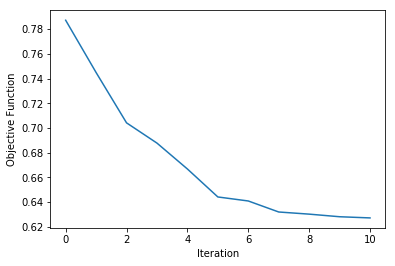

In [105]:
# Extract the summary from the returned LogisticRegressionModel instance trained
trainingSummary = mlrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
plt.plot(objectiveHistory)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

In [106]:
# I'm not sure why this takes such a long time to run....

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.

predictions_m1 = mlrModel.transform(train_setB)
evaluator = MulticlassClassificationEvaluator()
#print("training set AUC:" + str(evaluator.evaluate(predictions_m1)))
#predictions.show()
#print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

#cache(predictions_m1)

In [107]:
testpreds_m1 = mlrModel.transform(test_setB)
print("testing set AUC:" + str(evaluator.evaluate(testpreds_m1)))

testpreds_m1 = testpreds_m1.cache()

testing set AUC:0.6490822290915281


In [27]:
predictions.show(2)

+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|               words|            filtered|            features|label|       rawPrediction|         probability|prediction|
+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|             0|STUNNING LUXURY 2...|          1|   0|      0|     0|     0|[stunning, luxury...|[stunning, luxury...|(10000,[0,1,2,3,4...|    0|[1.15251727036277...|[0.69991865722232...|       0.0|
|             0|The new downtown ...|          0|   0|      0|     0|     0|[the, new, downto...|[new, downtown, f...|(10000,[0,2,4,5,6...|    0|[1.72652872797096...|[0.79961037646738...|       0.0|
+----

In [ ]:
### DON'T RUN THIS BECAUSE IT WON'T LET US DO THIS

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Configure an ML pipeline, which consists of tree stages: tokenizer, hashingTF, and lr.
#tokenizer = Tokenizer(inputCol="text", outputCol="words")
#hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
#lr = LogisticRegression(maxIter=10)
#pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

# We now treat the Pipeline as an Estimator, wrapping it in a CrossValidator instance.
# This will allow us to jointly choose parameters for all Pipeline stages.
# A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
# We use a ParamGridBuilder to construct a grid of parameters to search over.
# With 3 values for hashingTF.numFeatures and 2 values for lr.regParam,
# this grid will have 3 x 2 = 6 parameter settings for CrossValidator to choose from.
paramGrid = ParamGridBuilder() \
    .addGrid(countVectors.minDF, [1, 5, 10]) \
    .addGrid(mlr.regParam, [0.1, 0.01]) \
    .build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=3)  # use 3+ folds in practice

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(train_B)


In [97]:
from numpy import log

def log_loss(testpreds_m1, labels = "label", probability = "probability"):    
    labs_and_preds = testpreds_m1[labels, probability]
    
    return - labs_and_preds\
                .rdd\
                .map(lambda x: log(x[1][x[0]]))\
                .reduce(lambda x,y: x + y) / labs_and_preds.count()

In [108]:
log_loss(testpreds_m1)

0.7047536962191605

In [21]:
labs_and_preds = testpreds_m1["label", "probability"]
labs_and_preds.rdd.take(10)

#labs_and_preds.rdd\
#    .map(lambda x: log(x[1][x[0]]))\
#    .take(2)

[Row(label=0, probability=DenseVector([0.7132, 0.2098, 0.077])),
 Row(label=0, probability=DenseVector([0.7132, 0.2098, 0.077])),
 Row(label=0, probability=DenseVector([0.7132, 0.2098, 0.077])),
 Row(label=2, probability=DenseVector([0.3072, 0.6372, 0.0556])),
 Row(label=0, probability=DenseVector([0.4714, 0.4071, 0.1215])),
 Row(label=0, probability=DenseVector([0.6665, 0.2833, 0.0502])),
 Row(label=0, probability=DenseVector([0.4355, 0.3, 0.2645])),
 Row(label=0, probability=DenseVector([0.4627, 0.4088, 0.1285])),
 Row(label=1, probability=DenseVector([0.4564, 0.4178, 0.1258])),
 Row(label=1, probability=DenseVector([0.4657, 0.4124, 0.1219]))]

In [22]:
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[5150  296   26]
 [1433  359   40]
 [ 407  121   55]]


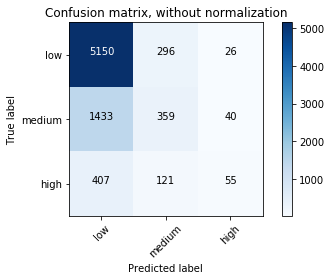

In [23]:
test_confusion_matrix_pd = testpreds_m1.select("label", "prediction").toPandas()

from sklearn.metrics import confusion_matrix


cnf_matrix = confusion_matrix(test_confusion_matrix_pd["label"], test_confusion_matrix_pd["prediction"])

plt.figure()
class_names = ["low", "medium", "high"]
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False,
                      title='Confusion matrix, without normalization')

## Second method = TF-IDF method. 
* Calculate the term frequency and inverse term frequency.
* Issue: I'm not sure how to combine the feature vector with other features for the model...

In [86]:
# This is based only on the description, not the other parts that I've separated out. I'm not sure how to combine them
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


tokenizer = Tokenizer(inputCol="description", outputCol="words")
hashtf = HashingTF(numFeatures=5000, inputCol="words", outputCol='tf')
idf = IDF(inputCol='tf', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
label_stringIdx = StringIndexer(inputCol = "interest_level", outputCol = "label")
pipeline = Pipeline(stages=[tokenizer, hashtf, idf, label_stringIdx])
pipelineFit = pipeline.fit(train4)
dataset2 = pipelineFit.transform(train4)

In [87]:
# Same train/test setup as before

(train_set, test_set) = dataset2.randomSplit([0.8, 0.2], seed = 1337)
#train_set.show(2) # BULLCRAP

train_set2 = train_set.select("features", "label")
#train_set2.show(5)
test_set2 = test_set.select("features", "label")
#test_set2.show(5)

#test_set.show(4)

In [88]:
# now make new train/test set not using the same seed
(train_setB, test_setB) = train_set2.randomSplit([0.8, 0.2], seed = 1000)
#train_setB.show(2) 

In [90]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0, family = "multinomial")

mlrModel2 = mlr.fit(train_setB)
testpreds_m2 = mlrModel2.transform(test_setB)

testpreds_m2 = testpreds_m2.cache()

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:42217)
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:42217)

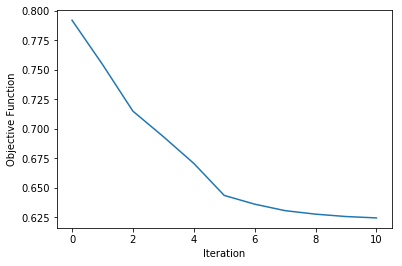

In [81]:
# Extract the summary from the returned LogisticRegressionModel instance trained
trainingSummary = mlrModel2.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
plt.plot(objectiveHistory)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

In [82]:
evaluator = MulticlassClassificationEvaluator()
print("training set AUC:" + str(evaluator.evaluate(testpreds_m2)))

training set AUC:0.6453317001871606


In [83]:
testpreds_m2.show(2)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(10000,[0,146,157...|  0.0|[3.15533851510890...|[0.98176868205804...|       0.0|
|(10000,[0,307,608...|  1.0|[1.77796492429616...|[0.83563015294358...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 2 rows



In [84]:
from numpy import log

def log_loss(testpreds_m2, labels = "label", probability = "probability"):    
    labs_and_preds = testpreds_m2[labels, probability]
    
    return - labs_and_preds\
                .rdd\
                .map(lambda x: log(x[1][x[0]]))\
                .reduce(lambda x,y: x + y) / labs_and_preds.count()

In [103]:
testpreds_m2.printSchema()


root
 |-- features: vector (nullable = true)
 |-- label: integer (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [85]:
testpreds_m2 = testpreds_m2.withColumn("label", testpreds_m2["label"].cast(IntegerType()))

log_loss(testpreds_m2) # FINALLY FIGURED IT OUT OMG

0.7206586124603565

In [ ]:
test_confusion_matrix_pd = testpreds_m1.select("label", "prediction").toPandas()
cnf_matrix = confusion_matrix(test_confusion_matrix_pd["label"], test_confusion_matrix_pd["prediction"])

plt.figure()
class_names = ["low", "medium", "high"]
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False,
                      title='Confusion matrix, without normalization')

## Method 3: WORD2VEC



In [24]:
from pyspark.ml.feature import Word2Vec
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Learn a mapping from words to Vectors.
word2Vec = Word2Vec(vectorSize=100, minCount=5, inputCol="filtered", outputCol="features")
# It takes way too long if we use a vector that's much larger than this

# Redo Pipeline
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, word2Vec])
pipelineFit = pipeline.fit(train4)
dataset3 = pipelineFit.transform(train4)

In [26]:
dataset3 = dataset3.withColumn("label", dataset3["interest_level"].cast(IntegerType()))
#dataset3.show(2)

In [27]:
dataset3.filter(dataset3["description"]=="           ").count()

0

In [28]:
# Same train/test setup as before

(train_set, test_set) = dataset3.randomSplit([0.8, 0.2], seed = 1337)
#train_set.show(2) # BULLCRAP

train_set2 = train_set.select("features", "label")
#train_set2.show(5)
test_set2 = test_set.select("features", "label")
#test_set2.show(5)

In [29]:
# now make new train/test set not using the same seed
(train_setB, test_setB) = train_set2.randomSplit([0.8, 0.2], seed = 1000)
#train_setB.show(2) 

In [30]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0, family = "multinomial")

mlrModel3 = mlr.fit(train_setB)
testpreds_m3 = mlrModel3.transform(test_setB)

testpreds_m3 = testpreds_m3.cache()


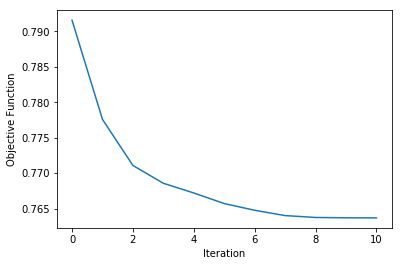

In [31]:
# Extract the summary from the returned LogisticRegressionModel instance trained
trainingSummary = mlrModel3.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
plt.plot(objectiveHistory)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

In [158]:
testpreds_m3.show(2)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.08383779561049...|    0|[1.17354040071253...|[0.72015238505755...|       0.0|
|[0.15706906641329...|    0|[0.98184264325437...|[0.66111884247343...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 2 rows



In [32]:
evaluator = MulticlassClassificationEvaluator()
print("training set AUC:" + str(evaluator.evaluate(testpreds_m3)))

training set AUC:0.5832184142748693


In [33]:
testpreds_m3 = testpreds_m3.withColumn("label", testpreds_m3["label"].cast(IntegerType()))

from numpy import log

def log_loss(testpreds_m3, labels = "label", probability = "probability"):    
    labs_and_preds = testpreds_m3[labels, probability]
    
    return - labs_and_preds\
                .rdd\
                .map(lambda x: log(x[1][x[0]]))\
                .reduce(lambda x,y: x + y) / labs_and_preds.count()

In [34]:
log_loss(testpreds_m3)

0.740501778013285

Confusion matrix, without normalization
[[6850    1    0]
 [2311    0    0]
 [ 754    0    0]]


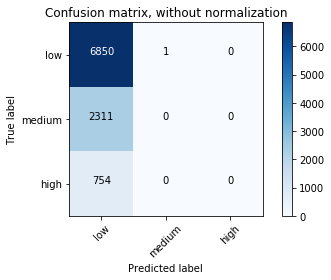

In [161]:
test_confusion_matrix_pd = testpreds_m3.select("label", "prediction").toPandas()

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_confusion_matrix_pd["label"], test_confusion_matrix_pd["prediction"])

plt.figure()
class_names = ["low", "medium", "high"]
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False,
                      title='Confusion matrix, without normalization')

In [ ]:
# LOLLLLLLLLLL

# Method 4: Just using some random interesting keywords

In [ ]:
train2 = train2.withColumn("interest_level", train2["interest_level"].cast(IntegerType()))


In [10]:
# Add columns for some potentially interesting aspects

train5 = train4.withColumn('exclamation', F.expr("IF(INSTR(description, '!') > 0, 1, 0)"))\
.withColumn('star', F.expr("IF(INSTR(description, '*') > 0, 1, 0)"))\
.withColumn('missing', F.expr("IF(INSTR(description, '        ') > 0, 1, 0)"))\
.withColumn('no fee', F.expr("IF(INSTR(description, 'no fee')|INSTR(description, 'NO FEE') >0,1,0)"))\
.withColumn('eq opp', F.expr("IF(INSTR(description, 'equal opportunity')|INSTR(description, 'EQUAL OPPORTUNITY')|INSTR(description, 'Equal opportunity') >0,1,0)"))
train4.show(2)

+--------------+--------------------+-----------+----+-------+------+------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|
+--------------+--------------------+-----------+----+-------+------+------+
|             1|A Brand New 3 Bed...|          1|   0|      0|     0|     0|
|             0|                none|          0|   0|      1|     0|     0|
+--------------+--------------------+-----------+----+-------+------+------+
only showing top 2 rows



In [11]:
# HOT NEIGHBORHOODS
train5 = train5.withColumn('Chelsea', F.expr("IF(INSTR(description, 'Chelsea') > 0, 1, 0)"))\
.withColumn('Meatpacking', F.expr("IF(INSTR(description, 'Meatpacking') > 0, 1, 0)"))\
.withColumn('SoHo', F.expr("IF(INSTR(description, 'Soho') > 0, 1, 0)"))\
.withColumn('Upper_East', F.expr("IF(INSTR(description, 'Upper East')|INSTR(description, 'upper East') >0,1,0)"))\
.withColumn('Brooklyn', F.expr("IF(INSTR(description, 'Brooklyn') >0,1,0)"))\
.withColumn('water', F.expr("IF(INSTR(description, 'water') >0,1,0)"))\
.withColumn('Times', F.expr("IF(INSTR(description, 'Times Square') >0,1,0)"))\
.withColumn('HK', F.expr("IF(INSTR(description, 'Hell') >0,1,0)"))\
.withColumn('CP', F.expr("IF(INSTR(description, 'Central Park') >0,1,0)"))\
.withColumn('Midtown', F.expr("IF(INSTR(description, 'Midtown') >0,1,0)"))\
.withColumn('BP', F.expr("IF(INSTR(description, 'Battery Park') >0,1,0)"))\
.withColumn('Morningside', F.expr("IF(INSTR(description, 'Morningside') >0,1,0)"))\
.withColumn('GD', F.expr("IF(INSTR(description, 'Garment') >0,1,0)"))\
.withColumn('MHill', F.expr("IF(INSTR(description, 'Murray') >0,1,0)"))\
.withColumn('East_Village', F.expr("IF(INSTR(description, 'East Village') >0,1,0)"))\
.withColumn('LE', F.expr("IF(INSTR(description, 'Lower East') >0,1,0)"))\
.withColumn('Chinatown', F.expr("IF(INSTR(description, 'Chinatown') >0,1,0)"))\
.withColumn('Tribeca', F.expr("IF(INSTR(description, 'Tribeca') >0,1,0)"))\
.withColumn('Financial', F.expr("IF(INSTR(description, 'Financial') >0,1,0)"))\
.withColumn('Little_Italy', F.expr("IF(INSTR(description, 'Little Italy') >0,1,0)"))\
.withColumn('Greenwich', F.expr("IF(INSTR(description, 'Greenwich') >0,1,0)"))\
.withColumn('Gramercy', F.expr("IF(INSTR(description, 'Gramercy') >0,1,0)"))\
.withColumn('Harlem', F.expr("IF(INSTR(description, 'Harlem') >0,1,0)"))






In [12]:
train5.groupBy("Little_Italy").count().show()

+------------+-----+
|Little_Italy|count|
+------------+-----+
|           1|  116|
|           0|49236|
+------------+-----+



In [13]:
# Same train/test setup as before

(train_set, test_set) = train5.randomSplit([0.8, 0.2], seed = 1337)
train_set.show(2) 


+--------------+--------------------+-----------+----+-------+------+------+-------+-----------+----+----------+--------+-----+-----+---+---+-------+---+-----------+---+-----+------------+---+---------+-------+---------+------------+---------+--------+------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|Chelsea|Meatpacking|SoHo|Upper_East|Brooklyn|water|Times| HK| CP|Midtown| BP|Morningside| GD|MHill|East_Village| LE|Chinatown|Tribeca|Financial|Little_Italy|Greenwich|Gramercy|Harlem|
+--------------+--------------------+-----------+----+-------+------+------+-------+-----------+----+----------+--------+-----+-----+---+---+-------+---+-----------+---+-----+------------+---+---------+-------+---------+------------+---------+--------+------+
**NO FEE**IMMEDI...|          1|   1|      0|     1|     0|      0|          0|   0|         0|       0|    0|    0|  0|  0|      0|  0|          0|  0|    0|           0|  0|        0|      0|        0|           0|    

In [16]:
# Make input/output vectors
from pyspark.sql.types import IntegerType
from pyspark.ml.linalg import DenseVector


train_setB = train_set.withColumn("interest_level", train_set["interest_level"].cast(IntegerType()))
input_data = train_setB.rdd.map(lambda x: (x[0], DenseVector(x[2:])))
df2 = sqlCtx.createDataFrame(input_data, ["label", "features"])
df2.show(2)

testB = test_set.withColumn("interest_level", test_set["interest_level"].cast(IntegerType()))
val_data = testB.rdd.map(lambda x: (x[0], DenseVector(x[2:])))
val2 = sqlCtx.createDataFrame(val_data, ["label", "features"])
val2.show(2)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[1.0,1.0,0.0,1.0,...|
|    0|[1.0,0.0,0.0,1.0,...|
+-----+--------------------+
only showing top 2 rows

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[0.0,1.0,0.0,0.0,...|
|    0|[0.0,0.0,1.0,0.0,...|
+-----+--------------------+
only showing top 2 rows



In [17]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0, family = "multinomial")

mlrModel4 = mlr.fit(df2)
testpreds_m4 = mlrModel4.transform(val2)

testpreds_m4 = testpreds_m4.cache()


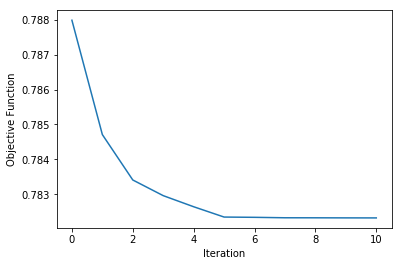

In [18]:
# Extract the summary from the returned LogisticRegressionModel instance trained
trainingSummary = mlrModel4.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
plt.plot(objectiveHistory)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

In [19]:
evaluator = MulticlassClassificationEvaluator()
print("training set AUC:" + str(evaluator.evaluate(testpreds_m4)))

training set AUC:0.5646067270433363


In [20]:
testpreds_m4 = testpreds_m4.withColumn("label", testpreds_m4["label"].cast(IntegerType()))

from numpy import log

def log_loss(testpreds_m4, labels = "label", probability = "probability"):    
    labs_and_preds = testpreds_m4[labels, probability]
    
    return - labs_and_preds\
                .rdd\
                .map(lambda x: log(x[1][x[0]]))\
                .reduce(lambda x,y: x + y) / labs_and_preds.count()

In [21]:
log_loss(testpreds_m4)

0.7836463492410052

Confusion matrix, without normalization
[[6851    0    0]
 [2311    0    0]
 [ 754    0    0]]


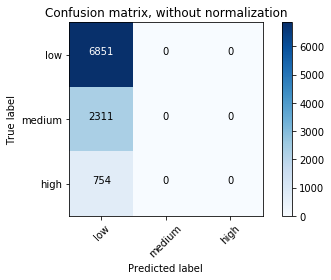

In [24]:
test_confusion_matrix_pd = testpreds_m4.select("label", "prediction").toPandas()

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_confusion_matrix_pd["label"], test_confusion_matrix_pd["prediction"])

plt.figure()
class_names = ["low", "medium", "high"]
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False,
                      title='Confusion matrix, without normalization')

Well that did a terrible job! I think I'd want to check with balancing the data and using cross validation

# Other features we haven't finished yet
ok, I don't think we've paid attention to a couple of other features that might be important. For me, I know that I like to have lots of pictures, so I'm going to create a variable that has counts of the number of pictures.

In [28]:
new_df.show(3)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|                  []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|             1|
|      1.0|       2|c5c8a357cba207596...|2016-06

In [30]:
# using the df where I made the label into integers
train_data_df_p = new_df.select("interest_level", "photos")
train_data_df_p.show(2)

+--------------+--------------------+
|interest_level|              photos|
+--------------+--------------------+
|             1|[https://photos.r...|
|             0|[https://photos.r...|
+--------------+--------------------+
only showing top 2 rows



In [36]:
photo_rdd = train_data_df_p.rdd
photo_rdd = photo_rdd.map(lambda x: (x[0], len(x[1])))

photo_df = sqlCtx.createDataFrame(photo_rdd, ["label", "features"])
photo_df.show(2)



+-----+--------+
|label|features|
+-----+--------+
|    1|       5|
|    0|      11|
+-----+--------+
only showing top 2 rows



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e0930f390>,
      dtype=object)

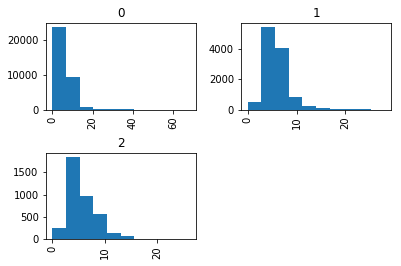

In [45]:
photo_pd = photo_df.toPandas()

photo_pd.hist("features","label")

It definitely looks like photos make some difference in differentiating between low and medium/high interest

In [78]:
# Same train/test setup as before
dataset5_rdd = photo_rdd.map(lambda x: (x[0], DenseVector(x[1:])))
dataset5_rdd.take(2)

[('1', DenseVector([5.0])), ('0', DenseVector([11.0]))]

In [89]:
dataset5 = sqlCtx.createDataFrame(dataset5_rdd, ["label", "features"])
dataset5 = dataset5.withColumn("label", dataset5["label"].cast(IntegerType()))
dataset5.printSchema()
dataset5.show(2)

root
 |-- label: integer (nullable = true)
 |-- features: vector (nullable = true)

+-----+--------+
|label|features|
+-----+--------+
|    1|   [5.0]|
|    0|  [11.0]|
+-----+--------+
only showing top 2 rows



In [90]:
(train_set, test_set) = dataset5.randomSplit([0.8, 0.2], seed = 1337)
test_set.show(2)

+-----+--------+
|label|features|
+-----+--------+
|    0|   [0.0]|
|    0|   [0.0]|
+-----+--------+
only showing top 2 rows



In [91]:
mlr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0, family = "multinomial")

mlrModel5 = mlr.fit(train_set)
testpreds_m5 = mlrModel5.transform(test_set)

testpreds_m5 = testpreds_m5.cache()

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(mlr.regParam, [0.1, 0.3, 0.5]) # regularization parameter
             .addGrid(mlr.elasticNetParam, [0.0, 0.1, 0.2]) # Elastic Net Parameter (Ridge = 0)
#            .addGrid(model.maxIter, [10, 20, 50]) #Number of iterations
#            .addGrid(idf.numFeatures, [10, 100, 1000]) # Number of features
             .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=mlr, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator, \
                    numFolds=5)

# Run cross validations
cvModel = cv.fit(train_set)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing

# Use test set here so we can measure the accuracy of our model on new data
predictions = cvModel.transform(test_set)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions)))

In [99]:
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions)))

Test: Area Under ROC: 0.5646067270433363


In [92]:
# No cross-validation

evaluator = MulticlassClassificationEvaluator()
print("training set AUC:" + str(evaluator.evaluate(testpreds_m5)))

training set AUC:0.5646067270433363


In [94]:
testpreds_m5 = testpreds_m5.withColumn("label", testpreds_m5["label"].cast(IntegerType()))

from numpy import log

def log_loss(testpreds_m5, labels = "label", probability = "probability"):    
    labs_and_preds = testpreds_m5[labels, probability]
    
    return - labs_and_preds\
                .rdd\
                .map(lambda x: log(x[1][x[0]]))\
                .reduce(lambda x,y: x + y) / labs_and_preds.count()

In [95]:
log_loss(testpreds_m5)

0.7906382989662181

In [100]:
log_loss(predictions)

0.790615167817945

Confusion matrix, without normalization
[[6851    0    0]
 [2311    0    0]
 [ 754    0    0]]


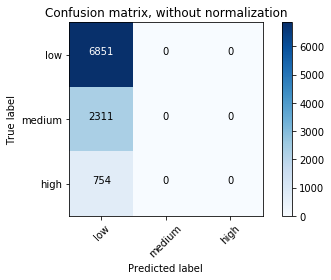

In [101]:
test_confusion_matrix_pd = predictions.select("label", "prediction").toPandas()

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_confusion_matrix_pd["label"], test_confusion_matrix_pd["prediction"])

plt.figure()
class_names = ["low", "medium", "high"]
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False,
                      title='Confusion matrix, without normalization')

### Final features

In [35]:
train_data_df2 = train_data_df.withColumn("bedprice",train_data_df["price"]/train_data_df["bedrooms"])

In [37]:
train_data_pd2 = train_data_df2.toPandas()

In [10]:
train_data_pd2.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,bedbath
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium,2.0


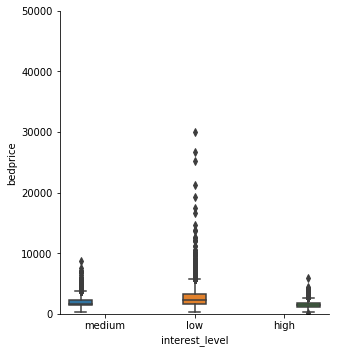

In [41]:
import seaborn as sns
sns.catplot(kind='box',        # Boxplot
               y='bedprice',       # Y-axis - values for boxplot
               x='interest_level',        # X-axis - first factor
               hue='interest_level',         # Second factor denoted by color
               data=train_data_pd2,        # Dataframe 
               #height=8,            # Figure size (x100px)      
               #aspect=1.5,        # Width = size * aspect 
               legend_out=False).set(ylim=(0, 50000)) 

In [42]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=["low", "medium", "high"], ordered=True)
test2 = train_data_pd2.assign(interest_level2 = lambda x: train_data_pd2.interest_level.astype(cat_type))


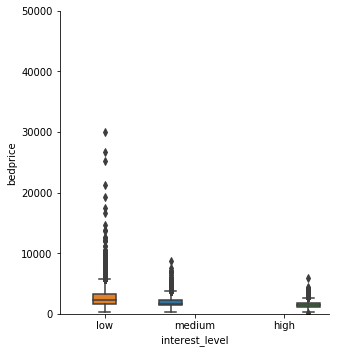

In [44]:
sns.catplot(kind='box',        # Boxplot
               y='bedprice',       # Y-axis - values for boxplot
               x='interest_level',        # X-axis - first factor
               hue='interest_level',         # Second factor denoted by color
               data=test2,        # Dataframe 
               #height=8,            # Figure size (x100px)      
               #aspect=1.5,        # Width = size * aspect 
               legend_out=False,
               order=['low','medium','high']).set(ylim=(0,50000))

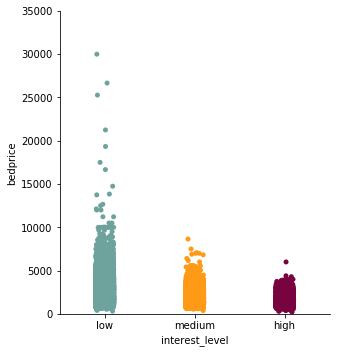

In [48]:
import seaborn
mypal = {"low": "#6da39c", "medium": "#ff9a16", "high":"#77043e"}
g = seaborn.catplot(x="interest_level", y="bedprice",data = train_data_pd2, order=["low","medium","high"], palette=mypal).set(ylim=(0, 35000))

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


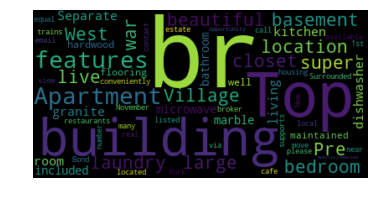

In [56]:
!pip install wordcloud
from wordcloud import WordCloud

# Start with one review:
text = train_data_pd2.description[2]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [80]:
low_data = train_data_pd[train_data_pd["interest_level"]== "low"]
low_data.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low


In [86]:
lowwordcloud = WordCloud(
                          background_color='white',
                          stopwords=add_stopwords,
                          max_words=200,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(str(low_data['description']))

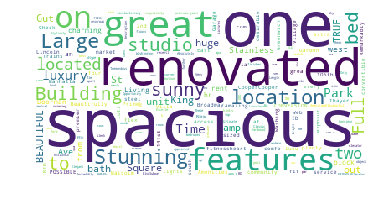

In [87]:
plt.imshow(lowwordcloud)
plt.axis('off')
plt.show()

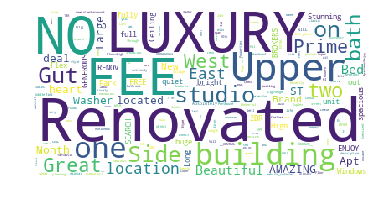

In [88]:
med_data = train_data_pd[train_data_pd["interest_level"]== "medium"]
medwordcloud = WordCloud(
                          background_color='white',
                          stopwords=add_stopwords,
                          max_words=200,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(str(med_data['description']))
plt.imshow(medwordcloud)
plt.axis('off')
plt.show()

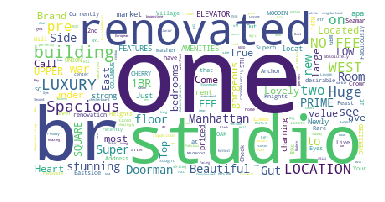

In [89]:
high_data = train_data_pd[train_data_pd["interest_level"]== "high"]
highwordcloud = WordCloud(
                          background_color='white',
                          stopwords=add_stopwords,
                          max_words=200,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(str(high_data['description']))
plt.imshow(highwordcloud)
plt.axis('off')
plt.show()